Initial notebook for the Unitary Fund's QRISE 2024 challenge 


Unitary Fund mitiq GitHub
https://github.com/unitaryfund/mitiq?tab=readme-ov-file

Qiskit Documentation
https://docs.quantum.ibm.com/

Cirq Documentation
https://quantumai.google/cirq/start/basics

mitiq Documentation
https://github.com/natestemen/talks/blob/main/2024-03-13-qrise/demo.ipynb



TODO: Attempt PEC, see if we can use Shor's algorithm



Basic ZNE using Cirq


In [4]:
import mitiq
from mitiq.zne.inference import RichardsonFactory, LinearFactory, ExpFactory
import cirq
import warnings

warnings.filterwarnings('ignore')
frontend="cirq"

def execute(circuit, noise_level=0.005):
    """Returns Tr[ρ |0⟩⟨0|] where ρ is the state prepared by the circuit
    with depolarizing noise."""

    # add depolarizing noise
    noisy_circuit = circuit.with_noise(cirq.depolarize(p=noise_level))

    return (
        cirq.DensityMatrixSimulator()
        .simulate(noisy_circuit)
        .final_density_matrix[0, 0]
        .real
    )

def execute_no_noise(circuit):
    return (
        cirq.DensityMatrixSimulator()
        .simulate(circuit)
        .final_density_matrix[0, 0]
        .real
    )

a, b, c = cirq.LineQubit.range(3)

circuit = cirq.Circuit(
    cirq.H(a),
    cirq.CNOT(a, b),
    cirq.CNOT(b, c),
    cirq.S(a),
    cirq.H(a),
    cirq.CNOT(a, b),
    cirq.CNOT(b, c),
    cirq.S(a),
)

factory = LinearFactory([1, 4, 7])
factory.run(circuit, execute_no_noise)
control = factory.reduce()

factory = RichardsonFactory([1, 4, 7])
factory.run(circuit, execute)
first = factory.reduce()

factory = LinearFactory([1, 4, 7])
factory.run(circuit, execute)
second = factory.reduce()

factory = ExpFactory([1, 4, 7])
factory.run(circuit, execute)
third = factory.reduce()

triple_zne = (first + second + third) / 3

print(f"control: {control}")
print(f"first: {first}")
print(f"second: {second}")
print(f"third: {third}")
print(f"avg: {triple_zne}")
print(f"error 1 = {abs(control - first)} error 2 = {abs(control - second)} error 3 = {abs(control - third)} error tzne = {abs(control - triple_zne)}")

control: 0.24999997019767756
first: 0.2511118948459625
second: 0.24677690366903943
third: 0.24929064821861374
avg: 0.2490598155778719
error 1 = 0.0011119246482849676 error 2 = 0.00322306652863813 error 3 = 0.000709321979063815 error tzne = 0.0009401546198056498


Let's try running this multiple times and graph our results.  While Triple ZNE seems to net better results, the repeatability seems somewhat unpredictable.

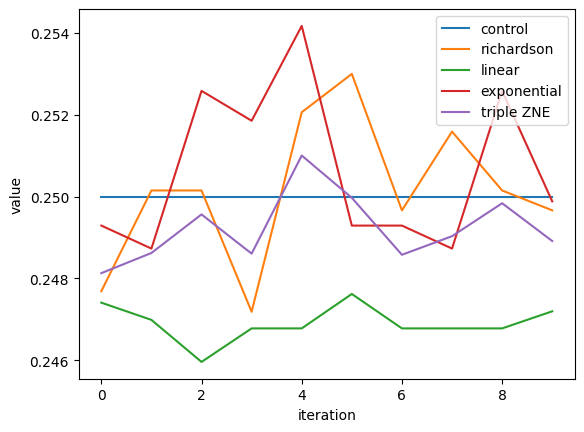

In [13]:
import matplotlib.pyplot as plt
import mitiq
from mitiq.zne.inference import RichardsonFactory, LinearFactory, ExpFactory
import cirq
import warnings

warnings.filterwarnings('ignore')
frontend="cirq"


x = []
control_y = []
richardson_y = []
linear_y = []
exp_y = []
t_zne_y = []

for i in range(0, 10):
    try:
        factory = LinearFactory([1, 4, 7])
        factory.run(circuit, execute_no_noise)
        control = factory.reduce()
        control_y.append(control)

        f2 = RichardsonFactory([1, 4, 7])
        f2.run(circuit, execute)
        first = f2.reduce()
        richardson_y.append(first)

        f3 = LinearFactory([1, 4, 7])
        f3.run(circuit, execute)
        second = f3.reduce()
        linear_y.append(second)

        f4 = ExpFactory([1, 4, 7])
        f4.run(circuit, execute)
        third = f4.reduce()
        exp_y.append(third)

        triple_zne = (first + second + third) / 3
        t_zne_y.append(triple_zne)

        x.append(i)
    except:
        continue


plt.plot(x, control_y, label="control")
plt.plot(x, richardson_y, label='richardson')
plt.plot(x, linear_y, label='linear')
plt.plot(x, exp_y, label='exponential')
plt.plot(x, t_zne_y, label='triple ZNE')
plt.xlabel("iteration")
plt.ylabel("value")
plt.legend()
plt.show()


What if we made a function to let a user choose whether to use Richardson, Linear, or Exp (can be expanded to include others) three times instead of using three different fit methods?

In [28]:
import mitiq
from mitiq.zne.inference import RichardsonFactory, LinearFactory, ExpFactory
import cirq
frontend="cirq"


def execute_no_noise(circuit):
    return (
        cirq.DensityMatrixSimulator()
        .simulate(circuit)
        .final_density_matrix[0, 0]
        .real
    )

a, b, c = cirq.LineQubit.range(3)

circuit = cirq.Circuit(
    cirq.H(a),
    cirq.CNOT(a, b),
    cirq.CNOT(b, c),
    cirq.S(a),
    cirq.H(a),
    cirq.CNOT(a, b),
    cirq.CNOT(b, c),
    cirq.S(a),
)

def execute(circuit, noise_level=0.005):
    noisy_circuit = circuit.with_noise(cirq.depolarize(p=noise_level))

    return (
        cirq.DensityMatrixSimulator()
        .simulate(noisy_circuit)
        .final_density_matrix[0, 0]
        .real
    )


factory = LinearFactory([1, 4, 7])
factory.run(circuit, execute_no_noise)
control = factory.reduce()

factory = LinearFactory([1, 4, 7])
factory.run(circuit, execute)
first = factory.reduce()

factory = LinearFactory([1, 4, 7])
factory.run(circuit, execute)
second = factory.reduce()

factory = LinearFactory([1, 4, 7])
factory.run(circuit, execute)
third = factory.reduce()

triple_zne = (first + second + third) / 3

print(f"control: {control}")
print(f"first: {first}")
print(f"second: {second}")
print(f"third: {third}")
print(f"avg: {triple_zne}")
print(f"error 1 = {abs(control - first)} error 2 = {abs(control - second)}" \
       f"error 3 = {abs(control - third)} error tzne = {abs(control - triple_zne)}")

control: 0.24999997019767756
first: 0.24677684406439465
second: 0.2463643799225489
third: 0.24740614990393328
avg: 0.24684912463029227
error 1 = 0.0032231261332829053 error 2 = 0.003635590275128664error 3 = 0.0025938202937442756 error tzne = 0.003150845567385291


Instead of using all 3, what if we write a function to let a user choose which fitting method is used?

In [8]:
import mitiq
from mitiq.zne.inference import RichardsonFactory, LinearFactory, ExpFactory
import cirq

frontend="cirq"

a, b, c = cirq.LineQubit.range(3)

c = cirq.Circuit(
    cirq.H(a),
    cirq.CNOT(a, b),
    cirq.CNOT(b, c),
    cirq.S(a),
    cirq.H(a),
    cirq.CNOT(a, b),
    cirq.CNOT(b, c),
    cirq.S(a),
)

def execute_no_noise(circuit):
    return (
        cirq.DensityMatrixSimulator()
        .simulate(circuit)
        .final_density_matrix[0, 0]
        .real
    )

def execute(circuit, noise_level=0.005):
    noisy_circuit = circuit.with_noise(cirq.depolarize(p=noise_level))

    return (
        cirq.DensityMatrixSimulator()
        .simulate(noisy_circuit)
        .final_density_matrix[0, 0]
        .real
    )

def zne(circuit):
    factory = LinearFactory([1, 4, 7])
    factory.run(circuit, execute_no_noise)
    return factory.reduce()

def execute_t_zne(circuit, factory_type):
    sum = 0
    match(factory_type):
        case 'l':
            for i in range(0, 3):
                factory = LinearFactory([1, 4, 7])
                factory.run(circuit, execute)
                sum += factory.reduce()
                print(sum)
            return sum / 3
        case 'e':
            for i in range(0, 3):
                factory = ExpFactory([1, 4, 7])
                factory.run(circuit, execute)
                sum += factory.reduce()
                print(sum)
            return sum / 3
        case 'r':
            for i in range(0, 3):
                factory = RichardsonFactory([1, 4, 7])
                factory.run(circuit, execute)
                sum += factory.reduce()
                print(sum)
            return sum / 3

zne_factory_type = input("Please enter a fitting method (l, e, r)")
control_no_noise = execute_no_noise(c)
control_noise = execute(c)
zne_single = zne(c)
t_zne = execute_t_zne(c, zne_factory_type)
print(f"ideal circuit: {control_no_noise}")
print(f'normal noise: {control_noise}')
print(f'single zne: {zne_single}')
print(f'triple zne: {t_zne}')
print(f'error w/o mitigation: {abs(control_no_noise - control_noise)}')
print(f'error with single zne: {abs(control_no_noise - zne_single)}')
print(f'error with t_zne: {abs(control_no_noise - t_zne)}')

0.24783268570899955
0.4939928650856017
0.7416115701198576
ideal circuit: 0.2499999701976776
normal noise: 0.24113260209560394
single zne: 0.24999997019767756
triple zne: 0.24720385670661918
error w/o mitigation: 0.00886736810207367
error with single zne: 5.551115123125783e-17
error with t_zne: 0.002796113491058433


Graph Results

We chose to make a line graph to show how closely repeating ZNE 3 times and averaging out the resulting value fit with the ideal value.

Unfortunately, even if there was a slight increase in cell 6, it seems relatively random, and cell 7 seems to show that it's better to just use ZNE once.  Perhaps this is because more executions means more chances to have errors from noise?

In [ ]:
import matplotlib as plt


DDD with mitiq


In [6]:
from mitiq.benchmarks import generate_ghz_circuit
from mitiq import ddd


num_qubits = 6
ghz = generate_ghz_circuit(num_qubits)

#print(ghz)
ddd.insert_ddd_sequences(ghz, rule=ddd.rules.xx)
ddd.execute_with_ddd(ghz, execute, rule=ddd.rules.xx)

0.4451800286769867

What about DDD plus ZNE?  What if we triple this up?

After testing, tripling ZNE up doesn't seem to impart improvement.  Additionally, it would seem that similar to Triple ZNE, more tests (or averaging) means more noise and therefore less accurate results.

In [31]:
from mitiq import zne
from mitiq.zne.scaling import fold_global, fold_gates_at_random, insert_id_layers
from mitiq import ddd

# Circuit
a, b, c = cirq.LineQubit.range(3)
cir = cirq.Circuit(
    cirq.H(a),
    cirq.CNOT(a, b),
    cirq.CNOT(b, c),
    cirq.S(a),
    cirq.H(a),
    cirq.CNOT(a, b),
    cirq.CNOT(b, c),
    cirq.S(a),
)

# Control
control = execute_no_noise(cir)
print(control)

# Demo example
@ddd.ddd_decorator(rule=ddd.rules.xyxy)
@zne.zne_decorator(factory=RichardsonFactory([1, 3, 7]), scale_noise=insert_id_layers)
def new_execute(circuit):
    return execute(circuit)

ddd_zne = new_execute(cir)
print(ddd_zne)
print(abs(control - ddd_zne))

# Takes longer
@ddd.ddd_decorator(rule=ddd.rules.xyxy)
@zne.zne_decorator(factory=RichardsonFactory([1, 3, 7]), scale_noise=insert_id_layers)
@zne.zne_decorator(factory=RichardsonFactory([1, 3, 7]), scale_noise=insert_id_layers)
@zne.zne_decorator(factory=RichardsonFactory([1, 3, 7]), scale_noise=insert_id_layers)
def new_execute(circuit):
    return execute(circuit)

ddd_3zne = new_execute(cir)
print(ddd_3zne)
print(abs(control - ddd_3zne))

0.24999997
0.2498570270836352
0.00014294311404242088
0.24496387223189217
0.005036097965785441


Idea: What if we write QRNG for Probabilistic Error Cancelation?  Would it even be possible to stack PEC with other methods?

Code taken from https://github.com/navaro1/quantum-gacek-cirq/blob/main/randomness/bit_qubit_h.py#L3

In [24]:
import cirq
import numpy as np

class QuantumRandomNumberGenerator:
    measurement_gate_name = 'qrng_measure'
    qubit_name_prefix = 'qrng_'

    def __init__(self, simulator=None):
        if simulator is None:
            simulator = cirq.Simulator()
        self.simulator = simulator

    def generate_binary_array(self, length: int) -> np.ndarray:
        qubits = cirq.NamedQubit.range(length, prefix=QuantumRandomNumberGenerator.qubit_name_prefix)
        h_gates = [cirq.H(qubit) for qubit in qubits]
        measurement_gate = cirq.measure(qubits, key=QuantumRandomNumberGenerator.measurement_gate_name)
        qrng_circuit = cirq.Circuit(h_gates, measurement_gate)
        result = self.simulator.simulate(qrng_circuit)
        return result.measurements[QuantumRandomNumberGenerator.measurement_gate_name]
    

qrng = QuantumRandomNumberGenerator()
print(qrng.generate_binary_array(length=3))

[1 0 1]


Now, let's try PEC with ZNE and/or DDD

In [ ]:
import cirq
from mitiq import zne, ddd, pec
